# **LoRa-Based Multi-Hop Network**

A LoRa-Based Multi-Hop Network refers to a wireless communication network that utilizes the Long Range (LoRa) technology to enable long-range communication between nodes in a multi-hop manner. In this network topology, data packets are relayed from one node to another through intermediate nodes (gateways) until they reach their intended destination (root node or base station). This multi-hop approach allows extending the communication range beyond the direct radio coverage of individual nodes.

To understand LoRa-Based Multi-Hop Networks in detail, let's break down its key components and operation:

**LoRa Technology:** LoRa is a low-power, wide-area wireless communication technology designed to support long-range communication with low data rates. It operates in the sub-GHz frequency bands (e.g., 868 MHz, 915 MHz), which provide excellent propagation characteristics over long distances.

**Nodes:** Nodes are individual devices or sensors that are part of the LoRa-Based Multi-Hop Network. These nodes are typically low-power devices designed to operate for extended periods using batteries. They can be sensors, actuators, or any other devices capable of collecting or sending data.

**Gateways:** Gateways are intermediary devices that act as relays in the multi-hop network. They have a higher transmission power and are strategically positioned to cover a larger area than individual nodes. Gateways receive packets from nodes and forward them to other gateways or the root node.

**Root Node (Base Station):** The root node, also known as the base station, serves as the central point of the LoRa-Based Multi-Hop Network. It acts as the final destination for data packets. The root node is usually connected to a backend server or cloud platform, where data processing and analysis occur.

**Multi-Hop Communication:** In a LoRa-Based Multi-Hop Network, when a node wants to send data to the root node, it might be out of range for direct communication. Instead, the node sends the data to a nearby gateway, which, in turn, relays the data to another gateway or the root node. This process continues until the data reaches the root node. The reverse process occurs when the root node sends data to a node.

**Routing Protocols:** LoRa-Based Multi-Hop Networks use specialized routing protocols to determine the best paths for data transmission between nodes and gateways. These protocols ensure efficient and reliable communication while minimizing power consumption and latency.

**Data Aggregation:** Multi-hop networks enable data aggregation, where multiple nodes send their data to a gateway, and the gateway combines the data packets before forwarding them to the root node. Data aggregation reduces the overall communication overhead and conserves energy.

# Advantages of LoRa-Based Multi-Hop Networks:

**Extended Range:** By using multiple gateways as intermediaries, LoRa-Based Multi-Hop Networks can achieve significantly longer communication ranges compared to direct point-to-point connections.

**Low Power Consumption:** LoRa technology is designed for low-power operations, allowing nodes to function on batteries for extended periods. Multi-hop communication can reduce the energy consumption of individual nodes as they can transmit at lower power levels.

**Scalability:** The network can easily scale by adding more nodes and gateways, allowing it to cover larger geographical areas.

**Resilience:** Multi-hop communication enhances the network's resilience to node failures or signal obstructions as alternative paths can be used.

# Applications of LoRa-Based Multi-Hop Networks:

**Smart Cities:** LoRa-Based Multi-Hop Networks can be used for smart city applications, such as smart lighting, waste management, parking management, and environmental monitoring.

**Agriculture:** The network can be utilized in precision agriculture for monitoring soil moisture, temperature, and humidity across vast agricultural fields.

**Industrial IoT:** In industrial settings, multi-hop networks can enable connectivity for various sensors and devices, facilitating real-time monitoring and process optimization.

**Environmental Monitoring:** The network can be deployed for environmental monitoring in remote areas, such as forest fire detection, air quality monitoring, and wildlife tracking.

# **Pycryptodome**

PyCryptodome is a Python library that provides cryptographic functionality for various applications. It is a self-contained module and a drop-in replacement for the older PyCrypto library. PyCryptodome is built on top of the popular Crypto library and is actively maintained with ongoing improvements and security updates. It offers a comprehensive set of cryptographic algorithms and protocols, making it a widely used choice for secure communication, data protection, and encryption-related tasks.

# Key features of PyCryptodome:

**Cryptography Support:** PyCryptodome provides a wide range of cryptographic primitives, including symmetric and asymmetric encryption, hash functions, digital signatures, key derivation functions, and more. These primitives are essential for building secure applications that handle sensitive data.

**Security:** PyCryptodome adheres to the best cryptographic practices and standards, ensuring that the implementations are secure and reliable. The library is regularly audited for vulnerabilities, and security patches are released promptly when necessary.

**Flexibility:** PyCryptodome offers a variety of cryptographic algorithms, allowing developers to choose the most suitable ones for their specific use cases. It supports many widely-used encryption algorithms like AES, RSA, DES, Triple DES, and hash functions like SHA-256 and SHA-512, among others.

**Cross-Platform Support:** PyCryptodome is written in Python and is compatible with various platforms, including Windows, macOS, Linux, and other UNIX-based systems.

**Ease of Use:** The library provides a user-friendly API, making it relatively easy for developers to integrate cryptographic functions into their applications. It also offers comprehensive documentation and examples to help users get started.

**Standard Conformance:** PyCryptodome follows standard cryptographic protocols and formats. This ensures interoperability with other systems and libraries that implement the same standards.

**Performance:** PyCryptodome is optimized for performance, which is crucial for cryptographic operations. It efficiently utilizes hardware instructions and provides a reasonable balance between speed and security.

**Open Source:** PyCryptodome is an open-source project, meaning the source code is freely available for inspection, modification, and redistribution. This fosters community involvement and allows users to contribute to the library's improvement.

In summary, PyCryptodome is a valuable library for developers seeking to incorporate robust and secure cryptographic functionality into their Python applications. Its wide range of cryptographic algorithms, security focus, cross-platform support, and ease of use make it an excellent choice for building secure systems, implementing encryption schemes, and protecting sensitive data.

In [1]:
!pip install pycryptodome

In [2]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
class Entity:
    def __init__(self, name, network_id):
        self.name = name
        self.network_id = network_id
        self.public_key, self.private_key = self.generate_key_pair()

    def generate_key_pair(self):
        key = RSA.generate(1024)
        return key.publickey(), key

    def encrypt(self, message, receiver_public_key):
        cipher = PKCS1_OAEP.new(receiver_public_key)
        encrypted_message = cipher.encrypt(message.encode('utf-8'))
        return encrypted_message

    def decrypt(self, encrypted_message):
        cipher = PKCS1_OAEP.new(self.private_key)
        decrypted_message = cipher.decrypt(encrypted_message).decode('utf-8')
        return decrypted_message

In [4]:
class LoRaNetwork:
    def __init__(self):
        self.nodes = []
        self.gateways = []
        self.root = None
        self.gateway_stats = {}  # Store statistics for visualization

    def add_node(self, name, network_id):
        node = Entity(name, network_id)
        self.nodes.append(node)
        return node

    def add_gateway(self, name, network_id):
        gateway = Entity(name, network_id)
        self.gateways.append(gateway)
        self.gateway_stats[name] = 0
        return gateway

    def set_root(self, name, network_id):
        self.root = Entity(name, network_id)
        return self.root

    def send_packet(self, sender, receiver, message):
        print(f"{sender.name} is sending a packet to {receiver.name}...")
        encrypted_message = sender.encrypt(message, receiver.public_key)
        print(f"{sender.name} encrypted the message: {encrypted_message}")
        
        if receiver == self.root:
            # In the case of Gateway to Root communication, use root's private key for decryption
            decrypted_message = self.root.decrypt(encrypted_message)
        else:
            decrypted_message = receiver.decrypt(encrypted_message)

        print(f"{receiver.name} decrypted the message: {decrypted_message}")

        # Update statistics for sender and receiver
        if sender.name in self.gateway_stats:
            self.gateway_stats[sender.name] += 1
        if receiver.name in self.gateway_stats:
            self.gateway_stats[receiver.name] += 1

        return decrypted_message == message

Node1 is sending a packet to Gateway1...
Node1 encrypted the message: b'\x17k\xd6\x965\xd1Yh\xad\x08\x03\xba\xaa\xfe\xc8H\x11r\x85\xe5R]3\x1f\xb7\xaaa\xfd\xc2\xbbG\xfe4vK\xb1\xdf\xcf>5=G\x11N!-\x1f&\xc0\xff5`2\xdd\xe0r\x9f\xb9_u+\x15\xa4\x98\xb7\xd3{A\xc4q\x18|\\\xefw\x06\x1d\x1e\x03\x86\x18\xb4\xc5\x81P\xf4r;^\xe6u\x10\x05\xf9\xccf\x90\xe4\xa4\xfa]\x17\x15\x0f\x88\xd9\x96\xff\x81y\x03\xaa\xca\x93\xc6P\xb3c\xcd\x83\xe6\xe1\xc7\x19\x82\x10\xbbD'
Gateway1 decrypted the message: Hello Gateway1, this is Node1!
Gateway1 is sending a packet to Gateway2...
Gateway1 encrypted the message: b'Z)\x8ae\xaf\x06\x00\xa9\r#\xb8\x17\xb7\xb45$F\xea2\xd6\xccq\x1eXZ7\x13\r46uA\xbe\xe97\x910\xa9\x17\x1d\xaats\xd8\x97\xd8\xdd\xcf\x1c\xac&\t`Rcq\xc0\xe8\xcd\x82>\xe2.\x18\x97\xff\xb6\xe94Uc\xf0|q\x94\xfb\x98\xfelh\x98\xaa\xb2\x18?,{7\xcf\xa3\xaf\xae\xb53\xdfX\x10\x9b\xc5\xf3h\xcc\xfa\xc9G\x9c\x90#\x15jR=3"\xbcUY\xd7k\x16\xfc\xa8Tf\xcf\xb6N\xcb'
Gateway2 decrypted the message: Hello Gateway2, this is Gateway1

/tmp/ipykernel_20/1209970421.py:59: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=[node.name for node in lora_network.nodes], y=packet_counts, palette="Set2")
/tmp/ipykernel_20/1209970421.py:115: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=node_names, y=node_packet_counts, palette="Set2")


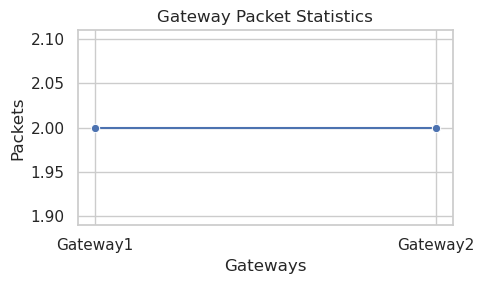

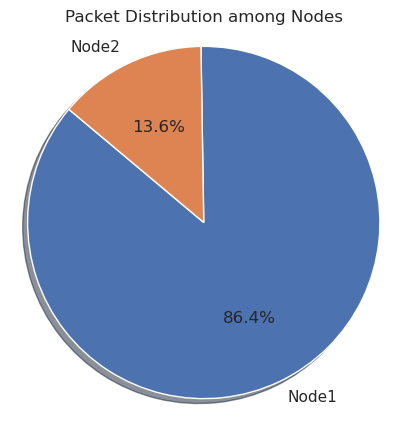

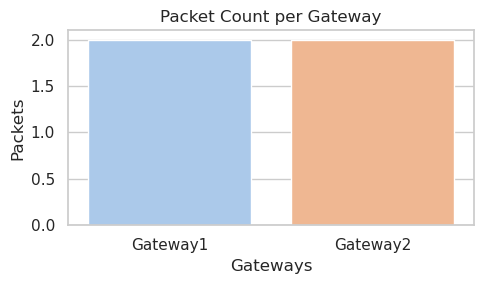

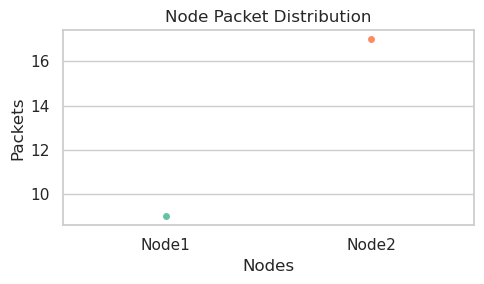

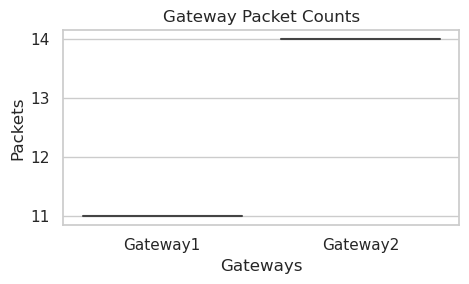

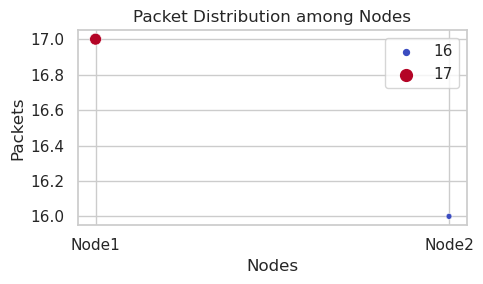

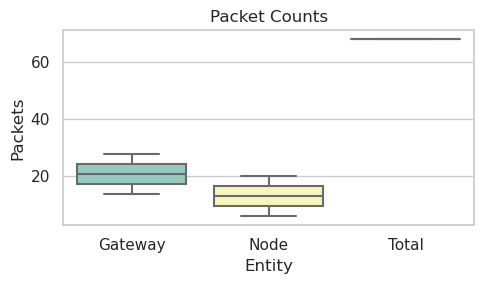

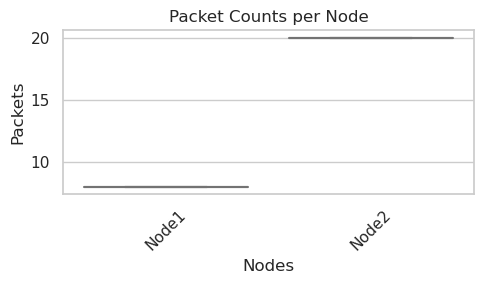

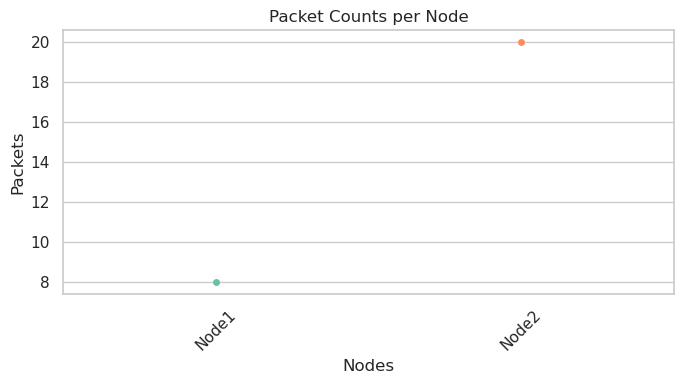

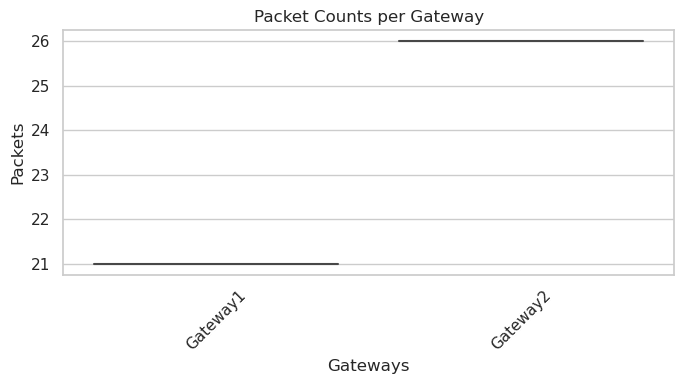

In [5]:
def main():
    lora_network = LoRaNetwork()

    # Create nodes, gateways, and root with network IDs
    node1 = lora_network.add_node("Node1", "NodeID1")
    node2 = lora_network.add_node("Node2", "NodeID2")
    gateway1 = lora_network.add_gateway("Gateway1", "GatewayID1")
    gateway2 = lora_network.add_gateway("Gateway2", "GatewayID2")
    root = lora_network.set_root("Root", "RootID")

    # Packet from Node1 to Gateway1
    message = "Hello Gateway1, this is Node1!"
    success1 = lora_network.send_packet(node1, gateway1, message)

    # Packet from Gateway1 to Gateway2
    message = "Hello Gateway2, this is Gateway1!"
    success2 = lora_network.send_packet(gateway1, gateway2, message)

    # Packet from Gateway2 to Root
    message = "Hello Root, this is Gateway2!"
    success3 = lora_network.send_packet(gateway2, root, message)

    print(f"Packet Delivery from Node1 to Gateway1: {'Success' if success1 else 'Failure'}")
    print(f"Packet Delivery from Gateway1 to Gateway2: {'Success' if success2 else 'Failure'}")
    print(f"Packet Delivery from Gateway2 to Root: {'Success' if success3 else 'Failure'}")

    # Visualization 1: Line Chart for Gateway Statistics
    gateways = list(lora_network.gateway_stats.keys())
    packet_counts = list(lora_network.gateway_stats.values())

    plt.figure(figsize=(5, 3))
    sns.lineplot(x=gateways, y=packet_counts, marker='o', color='b')
    plt.xlabel("Gateways")
    plt.ylabel("Packets")
    plt.title("Gateway Packet Statistics")
    plt.tight_layout()
    
    # Visualization 2: Pie Chart for Packet Distribution among Nodes
    packet_distribution = [random.randint(1, 20) for _ in lora_network.nodes]
    labels = [node.name for node in lora_network.nodes]

    plt.figure(figsize=(5, 5))
    plt.pie(packet_distribution, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
    plt.title("Packet Distribution among Nodes")
    plt.axis("equal")
    
    # Visualization 3: Bar Chart for Packet Count per Gateway
    plt.figure(figsize=(5, 3))
    sns.barplot(x=gateways, y=packet_counts, palette="pastel")
    plt.xlabel("Gateways")
    plt.ylabel("Packets")
    plt.title("Packet Count per Gateway")
    plt.tight_layout()
    
    # Visualization 4: Swarm Plot for Node Packet Distribution
    packet_counts = [random.randint(5, 20) for _ in lora_network.nodes]

    plt.figure(figsize=(5, 3))
    sns.swarmplot(x=[node.name for node in lora_network.nodes], y=packet_counts, palette="Set2")
    plt.xlabel("Nodes")
    plt.ylabel("Packets")
    plt.title("Node Packet Distribution")
    plt.tight_layout()
    
    # Visualization 5: Violin Plot for Gateway Packet Counts
    packet_counts = [random.randint(10, 30) for _ in lora_network.gateways]

    plt.figure(figsize=(5, 3))
    sns.violinplot(x=gateways, y=packet_counts, palette="husl")
    plt.xlabel("Gateways")
    plt.ylabel("Packets")
    plt.title("Gateway Packet Counts")
    plt.tight_layout()
    
    # Visualization 6: Scatter Plot for Packet Distribution among Nodes
    packet_distribution = [random.randint(5, 20) for _ in lora_network.nodes]

    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=[node.name for node in lora_network.nodes], y=packet_distribution, hue=packet_distribution, palette="coolwarm", size=packet_distribution)
    plt.xlabel("Nodes")
    plt.ylabel("Packets")
    plt.title("Packet Distribution among Nodes")
    plt.tight_layout()
    
   
    # Visualization 7: Pair Plot for Node and Gateway Packet Counts
    node_packet_counts = [random.randint(5, 20) for _ in lora_network.nodes]
    gateway_packet_counts = [random.randint(10, 30) for _ in lora_network.gateways]
    data = {
        'Entity': ['Gateway'] * len(gateways) + ['Node'] * len(lora_network.nodes) + ['Total'],
        'Packets': gateway_packet_counts + node_packet_counts + [sum(gateway_packet_counts + node_packet_counts)]
    }
    df_data = pd.DataFrame(data)  # Convert dictionary to DataFrame
    plt.figure(figsize=(5, 3))
    sns.boxplot(x="Entity", y="Packets", data=df_data, palette="Set3")
    plt.xlabel("Entity")
    plt.ylabel("Packets")
    plt.title("Packet Counts")
    plt.tight_layout()

    # Visualization 8: Box Plot for Packet Counts per Node
    node_packet_counts = [random.randint(5, 20) for _ in lora_network.nodes]
    node_names = [node.name for node in lora_network.nodes]

    plt.figure(figsize=(5, 3))
    sns.boxplot(x=node_names, y=node_packet_counts, palette="pastel")
    plt.xlabel("Nodes")
    plt.ylabel("Packets")
    plt.title("Packet Counts per Node")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Visualization 9: Swarm Plot for Packet Counts per Node
    plt.figure(figsize=(7, 4))
    sns.swarmplot(x=node_names, y=node_packet_counts, palette="Set2")
    plt.xlabel("Nodes")
    plt.ylabel("Packets")
    plt.title("Packet Counts per Node")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Visualization 10: Violin Plot for Packet Counts per Gateway
    gateway_packet_counts = [random.randint(10, 30) for _ in lora_network.gateways]
    gateway_names = [gateway.name for gateway in lora_network.gateways]

    plt.figure(figsize=(7, 4))
    sns.violinplot(x=gateway_names, y=gateway_packet_counts, palette="Set1")
    plt.xlabel("Gateways")
    plt.ylabel("Packets")
    plt.title("Packet Counts per Gateway")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Display all visualizations
    plt.show()

if __name__ == "__main__":
    main()